# Data Ingestion & EDA Module

### Import libraries

In [87]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler

### Dataset Information

##### **CMAPSS Jet Engine Simulated Data (NASA)**
[Link to dataset](https://data.nasa.gov/Aerospace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6/about_data)

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise.

The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective of the competition is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to:
1) unit number
2) time, in cycles
3) operational setting 1
4) operational setting 2
5) operational setting 3
6) sensor measurement 1
7) sensor measurement 2
...
26) sensor measurement 26

Data Set: FD001
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: ONE (HPC Degradation)

Data Set: FD002
Train trjectories: 260
Test trajectories: 259
Conditions: SIX
Fault Modes: ONE (HPC Degradation)

Data Set: FD003
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: TWO (HPC Degradation, Fan Degradation)

Data Set: FD004
Train trjectories: 248
Test trajectories: 249
Conditions: SIX
Fault Modes: TWO (HPC Degradation, Fan Degradation)

Reference: A. Saxena, K. Goebel, D. Simon, and N. Eklund, ‘Damage Propagation Modeling for Aircraft Engine Run-to-Failure Simulation’, in the Proceedings of the 1st International Conference on Prognostics and Health Management (PHM08), Denver CO, Oct 2008.

### Load the data

In [4]:
os.getcwd()

'c:\\Users\\amman\\Documents\\MLOPS\\Aircraft-Engine-Predictive-Maintenance\\notebooks'

In [ ]:
os.chdir("../")
os.getcwd()

'c:\\Users\\amman\\Documents\\MLOPS\\Aircraft-Engine-Predictive-Maintenance'

In [32]:
data_path = r"data/raw/CMAPSSData"
train_file = os.path.join(data_path, "train_FD001.txt")
test_file = os.path.join(data_path, "test_FD001.txt")
rul_file = os.path.join(data_path, "RUL_FD001.txt")

# Column names based on dataset description
column_names = ["unit", "time", "setting_1", "setting_2", "setting_3"] + [f"sensor_{i}" for i in range(1, 22)]

# Load data
train_df = pd.read_csv(train_file, delim_whitespace=True, header=None, names=column_names, engine='python')
test_df = pd.read_csv(test_file, delim_whitespace=True, header=None, names=column_names, engine='python')
rul_df = pd.read_csv(rul_file, delim_whitespace=True, header=None, names=["RUL"])




C:\Users\amman\AppData\Local\Temp\ipykernel_5764\4244553124.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_df = pd.read_csv(train_file, delim_whitespace=True, header=None, names=column_names, engine='python')
C:\Users\amman\AppData\Local\Temp\ipykernel_5764\4244553124.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_df = pd.read_csv(test_file, delim_whitespace=True, header=None, names=column_names, engine='python')
C:\Users\amman\AppData\Local\Temp\ipykernel_5764\4244553124.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rul_df = pd.read_csv(rul_file, delim_whitespace=True, header=None, names=["RUL"])


In [33]:
train_df.head()

,unit,time,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [37]:
test_df.head()

,unit,time,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [36]:
rul_df.head()

,RUL
0,112
1,98
2,69
3,82
4,91


In [38]:
print("Train Data:")
print(train_df.info())
print("\nTest Data:")
print(test_df.info())
print("\RUL Data:")
print(rul_df.info())

Train Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unit       20631 non-null  int64  
 1   time       20631 non-null  int64  
 2   setting_1  20631 non-null  float64
 3   setting_2  20631 non-null  float64
 4   setting_3  20631 non-null  float64
 5   sensor_1   20631 non-null  float64
 6   sensor_2   20631 non-null  float64
 7   sensor_3   20631 non-null  float64
 8   sensor_4   20631 non-null  float64
 9   sensor_5   20631 non-null  float64
 10  sensor_6   20631 non-null  float64
 11  sensor_7   20631 non-null  float64
 12  sensor_8   20631 non-null  float64
 13  sensor_9   20631 non-null  float64
 14  sensor_10  20631 non-null  float64
 15  sensor_11  20631 non-null  float64
 16  sensor_12  20631 non-null  float64
 17  sensor_13  20631 non-null  float64
 18  sensor_14  20631 non-null  float64
 19  sensor_15  20631 non-null  float64

In [39]:
print(f"Train data shape: ", train_df.shape)
print(f"Test data shape: ", test_df.shape)
print(f"RUL data shape: ", rul_df.shape)

Train data shape:  (20631, 26)
Test data shape:  (13096, 26)
RUL data shape:  (100, 1)


#### Check for missing values

In [44]:
print("Missing records in training set: \n", train_df.isnull().sum())

Missing records in training set: 
 unit         0
time         0
setting_1    0
setting_2    0
setting_3    0
sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
sensor_20    0
sensor_21    0
dtype: int64


In [46]:
print("Missing records in test set: \n", test_df.isnull().sum())

Missing records in test set: 
 unit         0
time         0
setting_1    0
setting_2    0
setting_3    0
sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
sensor_20    0
sensor_21    0
dtype: int64


#### Check for duplicates

In [52]:
print(int(train_df.duplicated().any().sum()))
print(int(test_df.duplicated().any().sum()))

0
0


### Dataset Stats

In [53]:
train_df.describe()

,unit,time,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [54]:
test_df.describe()

,unit,time,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,13096.00,13096.000000,13096.000000,13096.000000,1.309600e+04,...,13096.000000,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.0,13096.0,13096.000000,13096.000000
mean,51.543907,76.836515,-0.000011,0.000004,100.0,518.67,642.475088,1588.099204,1404.735362,1.462000e+01,...,521.747724,2388.071025,8138.947817,8.425844,3.000000e-02,392.571625,2388.0,100.0,38.892502,23.335743
std,28.289423,53.057749,0.002203,0.000294,0.0,0.00,0.400899,5.003274,6.688309,1.776425e-15,...,0.559627,0.056934,10.188605,0.029009,1.040874e-17,1.233577,0.0,0.0,0.141681,0.084120
min,1.000000,1.000000,-0.008200,-0.000600,100.0,518.67,641.130000,1569.040000,1384.390000,1.462000e+01,...,519.380000,2387.890000,8108.500000,8.332800,3.000000e-02,389.000000,2388.0,100.0,38.310000,22.935400
25%,28.000000,33.000000,-0.001500,-0.000200,100.0,518.67,642.197500,1584.600000,1399.950000,1.462000e+01,...,521.380000,2388.030000,8132.310000,8.405600,3.000000e-02,392.000000,2388.0,100.0,38.800000,23.281600
50%,52.000000,69.000000,-0.000000,-0.000000,100.0,518.67,642.460000,1587.990000,1404.440000,1.462000e+01,...,521.780000,2388.070000,8138.390000,8.424900,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.339200
75%,76.000000,113.000000,0.001500,0.000300,100.0,518.67,642.740000,1591.362500,1409.050000,1.462000e+01,...,522.150000,2388.110000,8144.360000,8.444300,3.000000e-02,393.000000,2388.0,100.0,38.990000,23.393600
max,100.000000,303.000000,0.007800,0.000700,100.0,518.67,644.300000,1607.550000,1433.360000,1.462000e+01,...,523.760000,2388.320000,8220.480000,8.541400,3.000000e-02,397.000000,2388.0,100.0,39.410000,23.641900


### Basic EDA

##### Visualising Remaining Useful Life (RUL) Distribution

<Figure size 800x600 with 0 Axes>

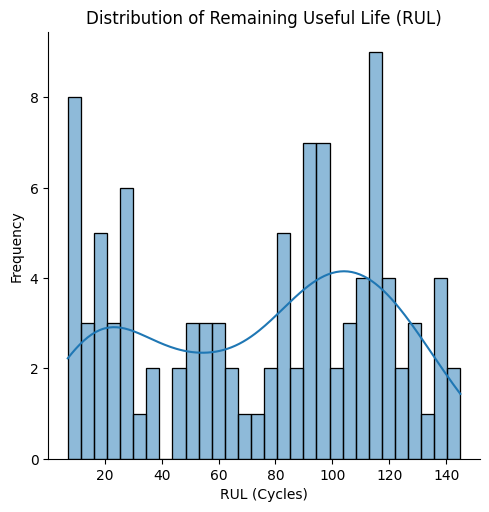

In [62]:
plt.figure(figsize=(8,6))
sns.displot(rul_df["RUL"], kde=True, bins=30)
plt.title("Distribution of Remaining Useful Life (RUL)")
plt.xlabel("RUL (Cycles)")
plt.ylabel("Frequency")
plt.show()

#### Sample visualisation of engine degredation over time

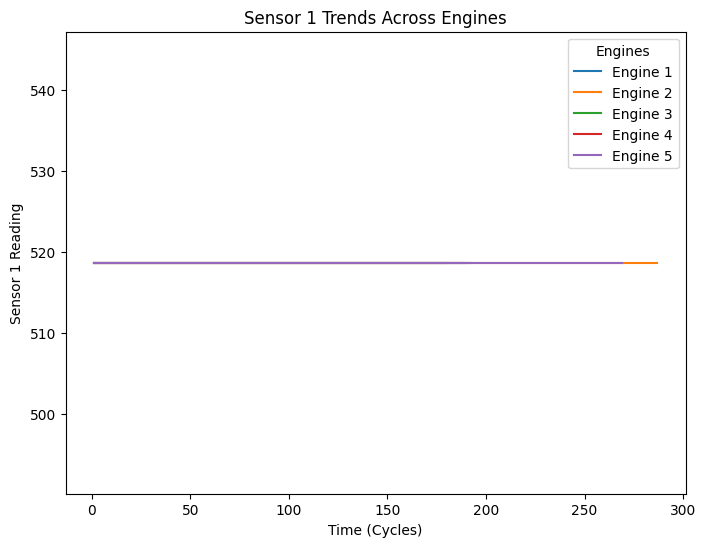

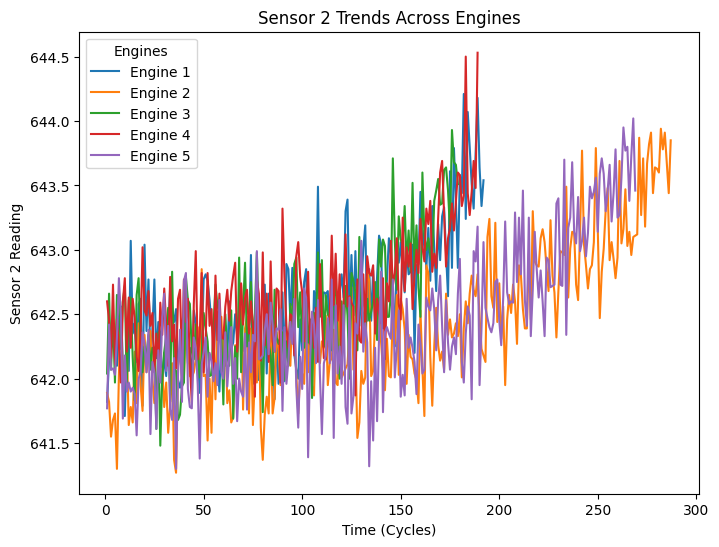

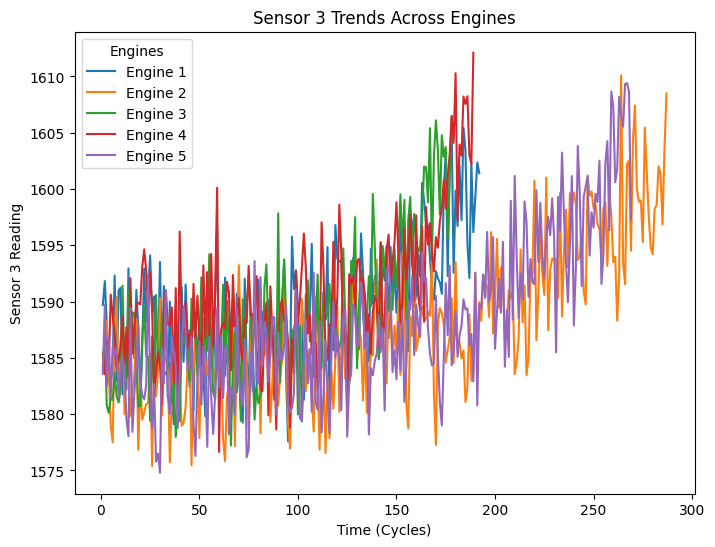

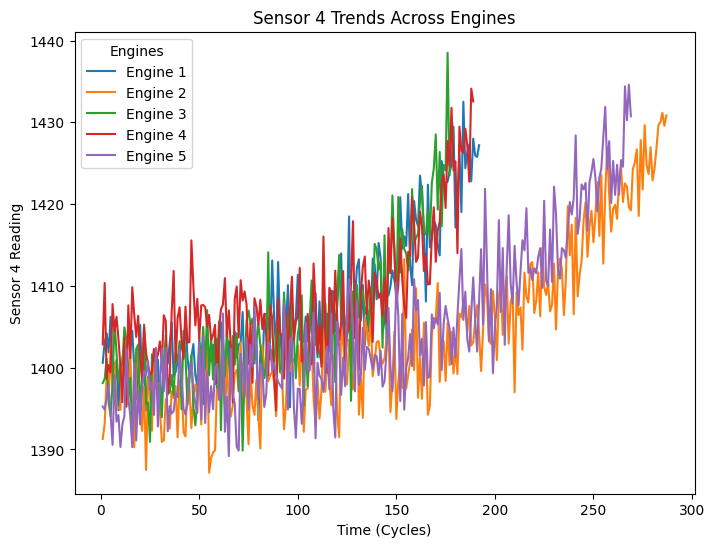

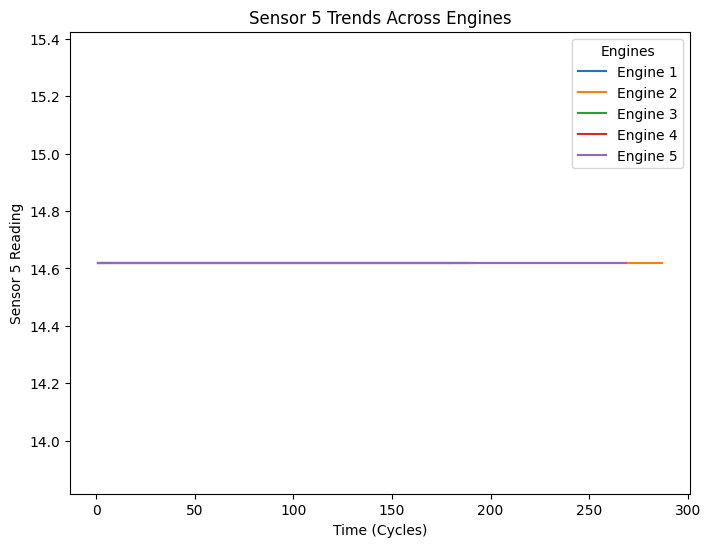

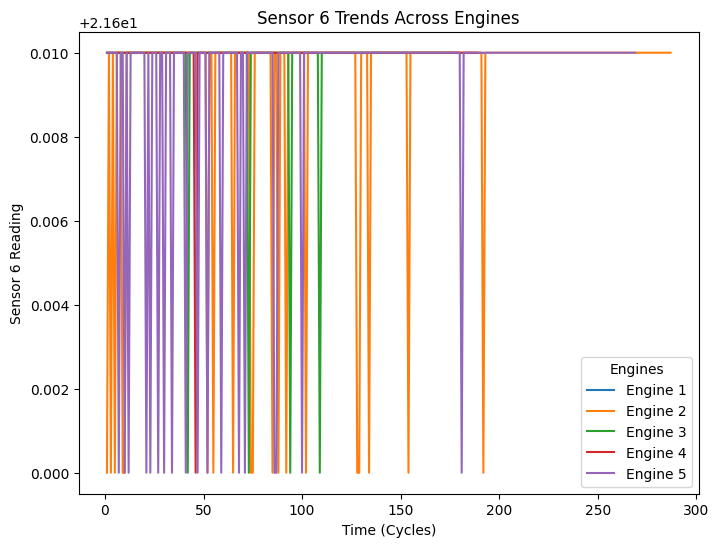

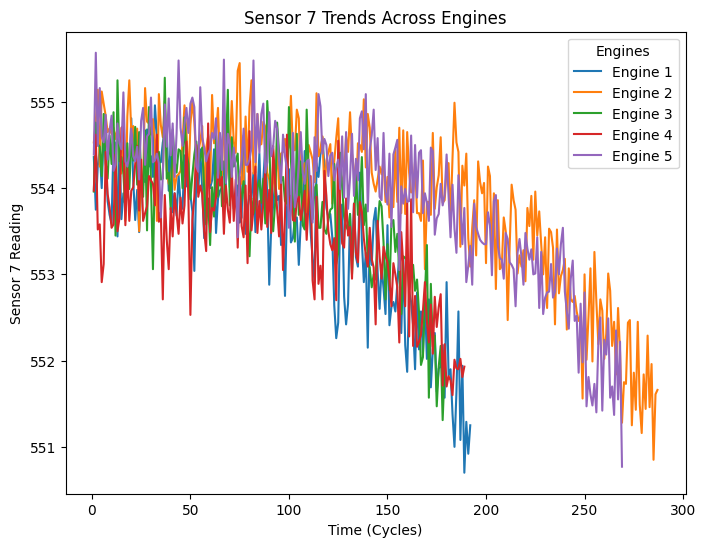

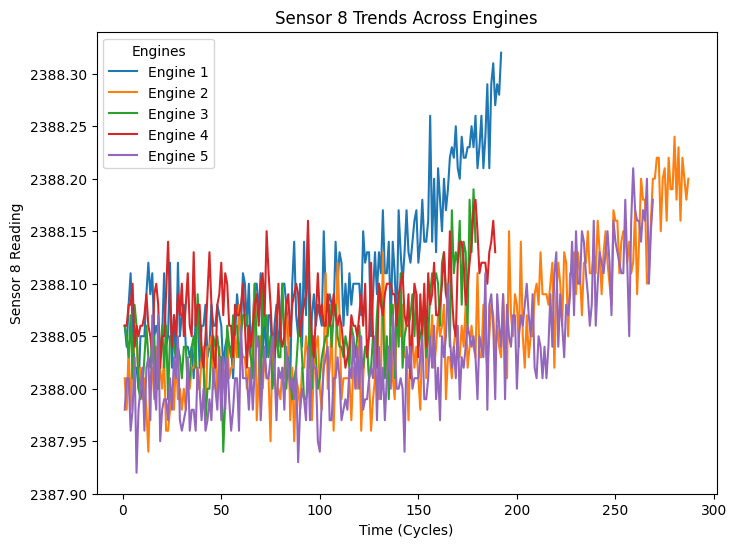

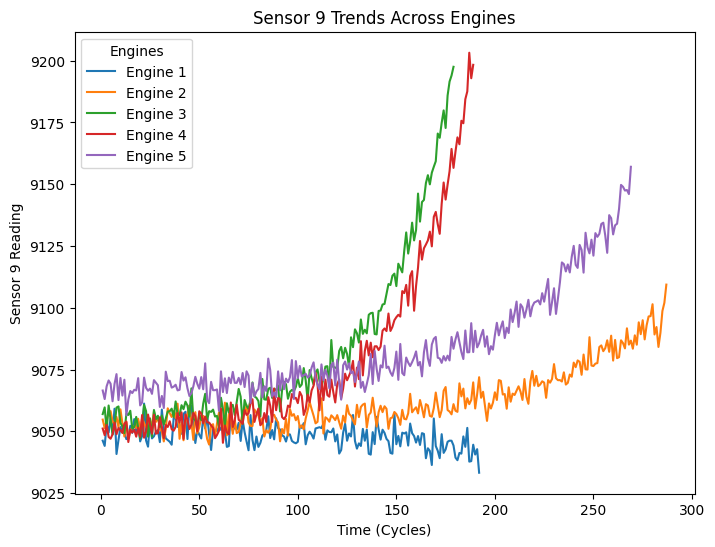

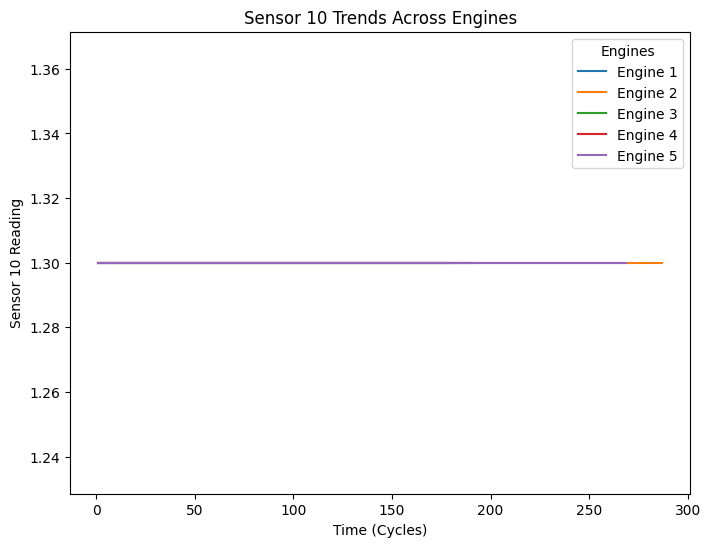

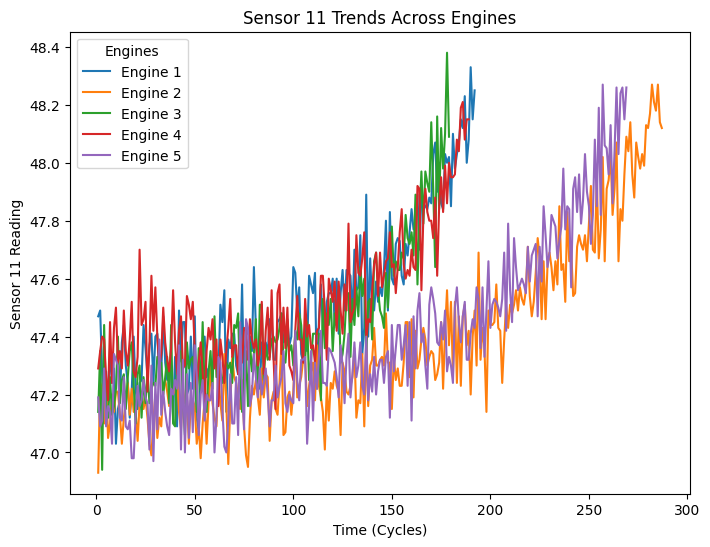

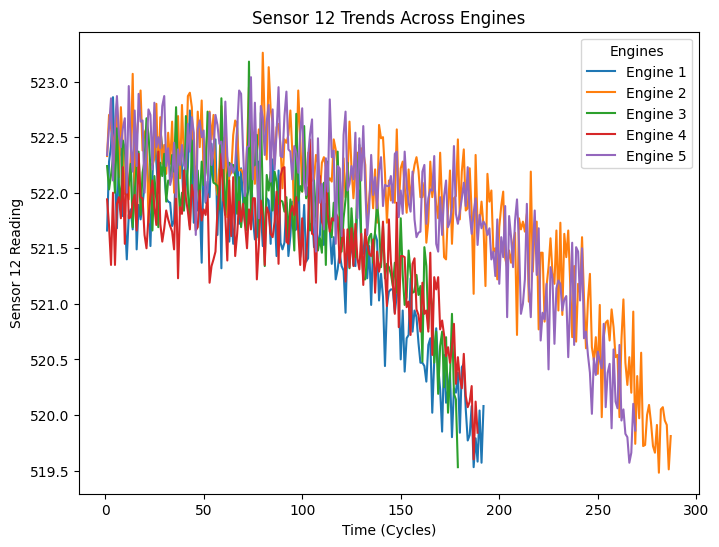

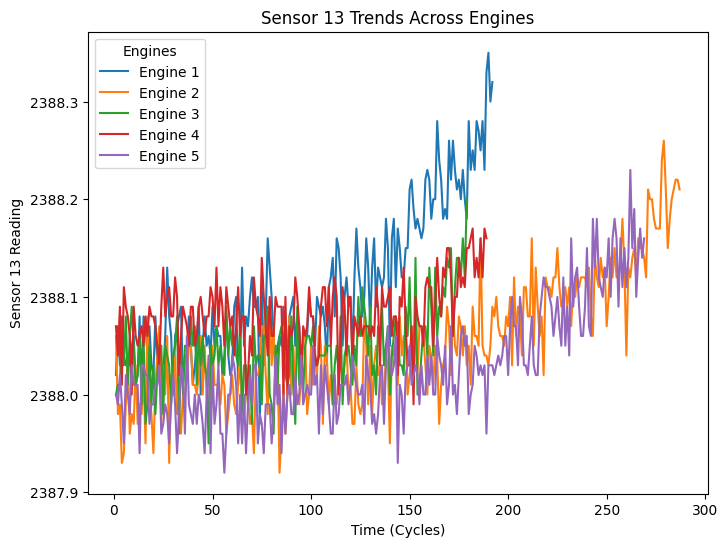

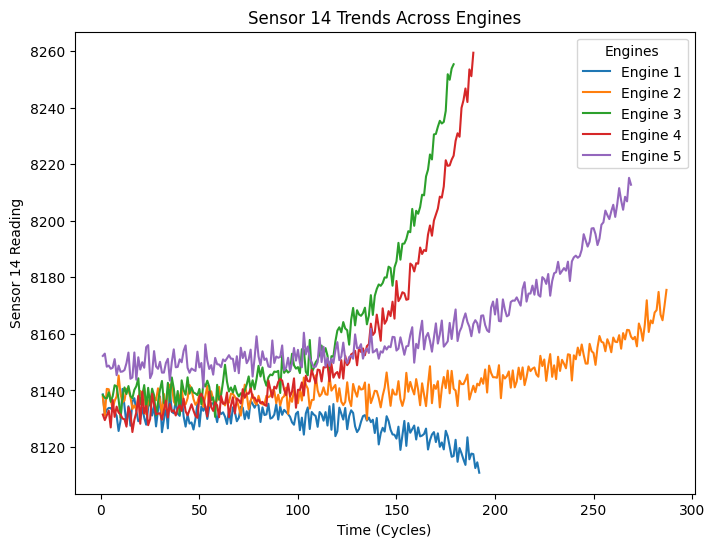

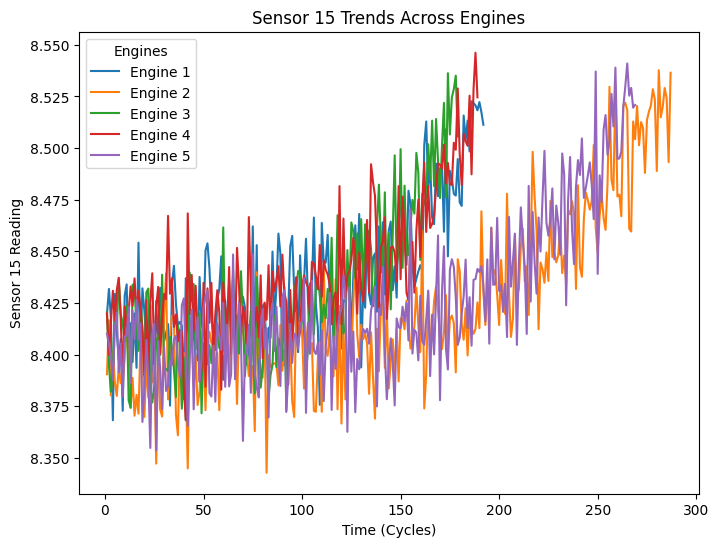

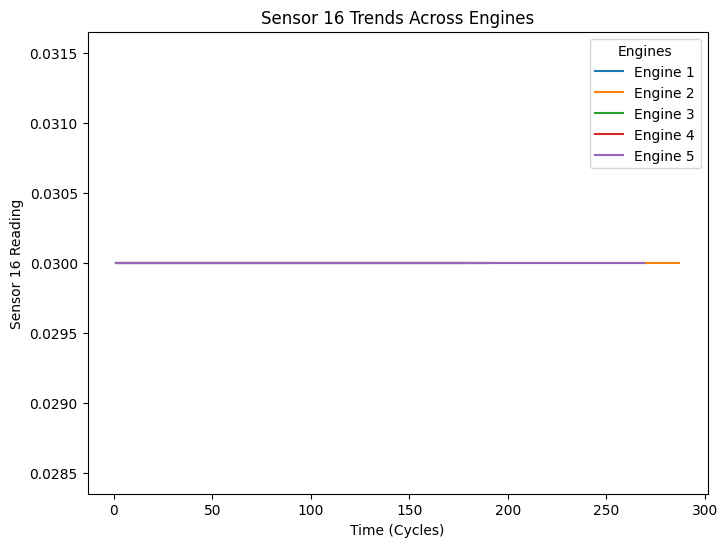

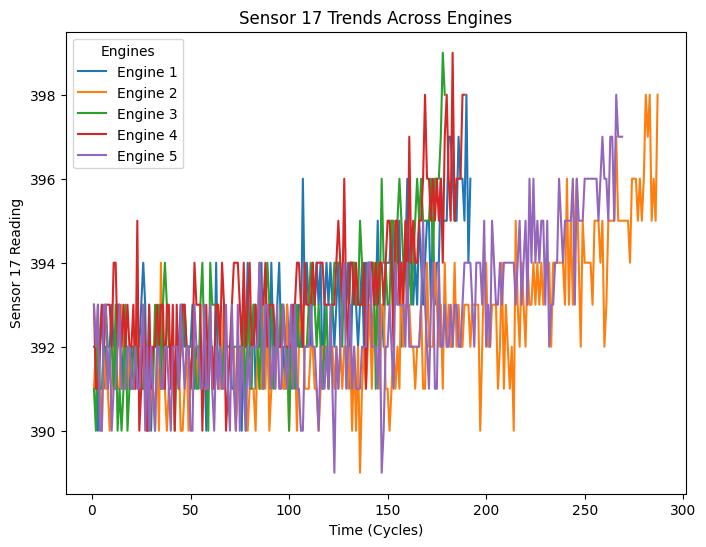

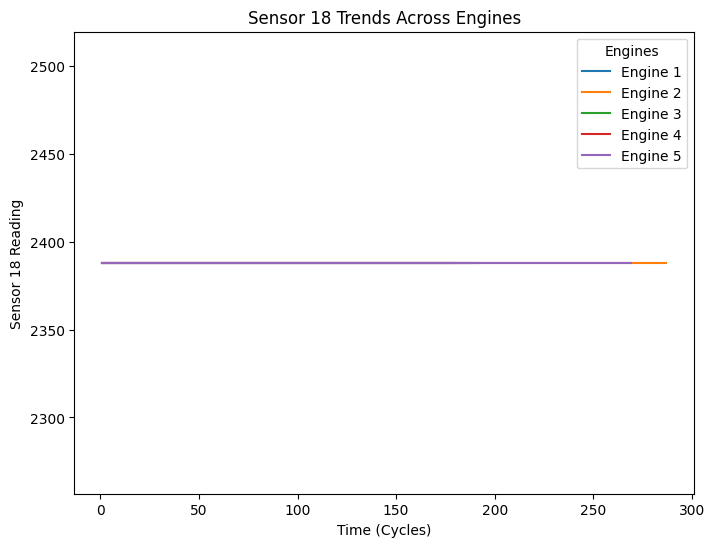

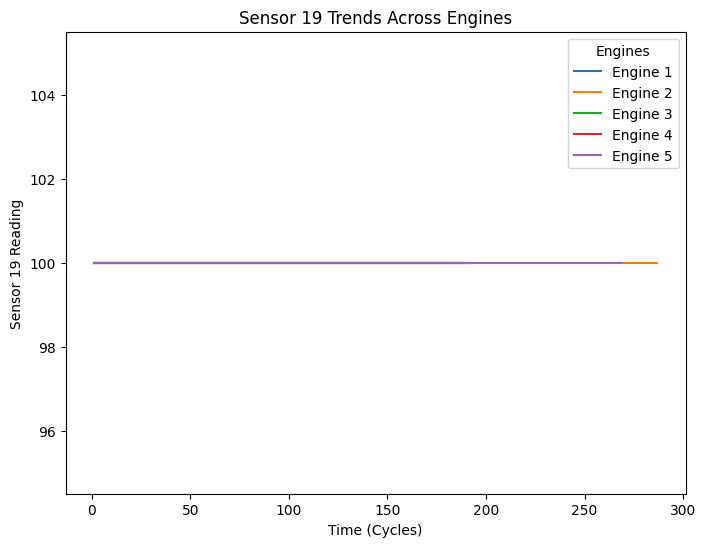

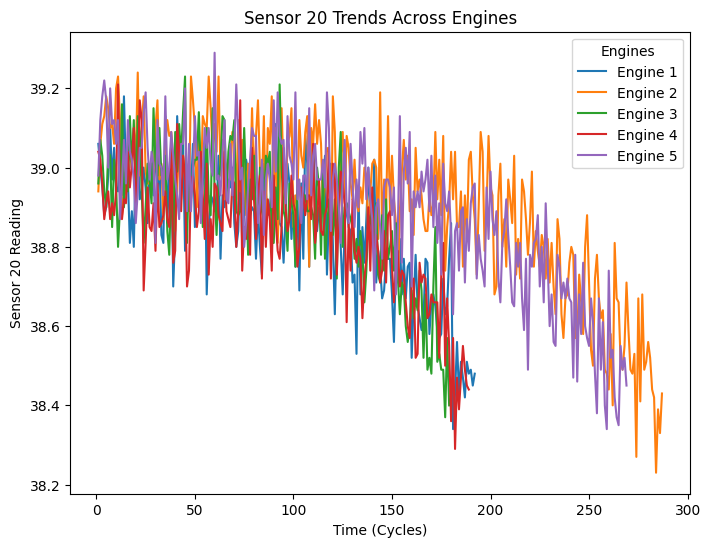

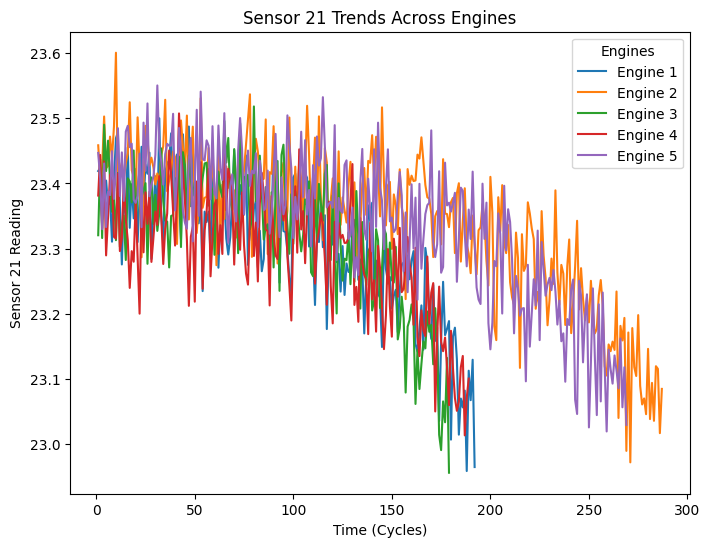

In [90]:
for i in range(1, 22):
    plt.figure(figsize=(8, 6))  

   
    for unit_id in train_df["unit"].unique()[:5]:  
        subset = train_df[train_df["unit"] == unit_id]
    
        plt.plot(subset["time"], subset[f"sensor_{i}"], label=f"Engine {unit_id}")
    
    # Customize plot
    plt.xlabel("Time (Cycles)")
    plt.ylabel(f"Sensor {i} Reading")
    plt.title(f"Sensor {i} Trends Across Engines")
    plt.legend(title="Engines")
    plt.show()


We can see that sensors 1, 5, 6, 10, 16 and 19 show constant readings for the full timeseries and are therefore not important for training machine learning models. These will be dropped in the data preprocessing stage

#### Visualise Sensor Reading Distributions

C:\Users\amman\AppData\Local\Temp\ipykernel_5764\3103364927.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


KeyboardInterrupt: 

<Figure size 1200x600 with 0 Axes>

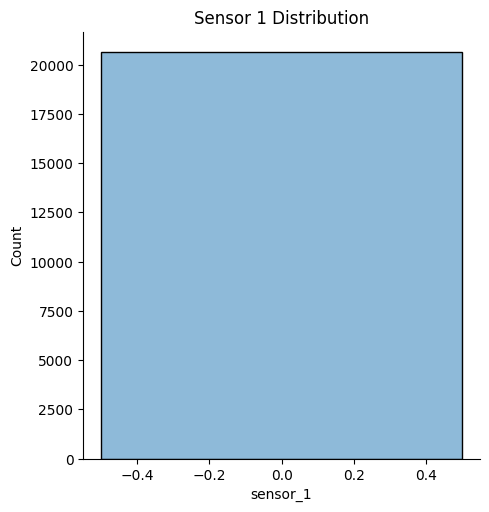

<Figure size 1200x600 with 0 Axes>

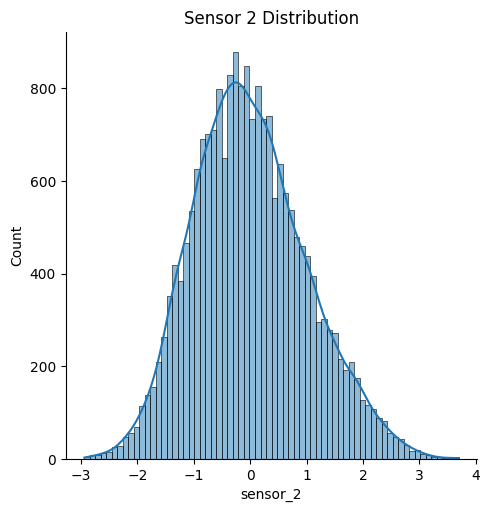

<Figure size 1200x600 with 0 Axes>

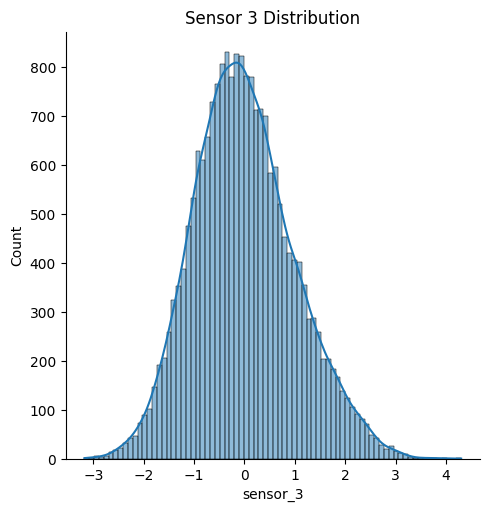

<Figure size 1200x600 with 0 Axes>

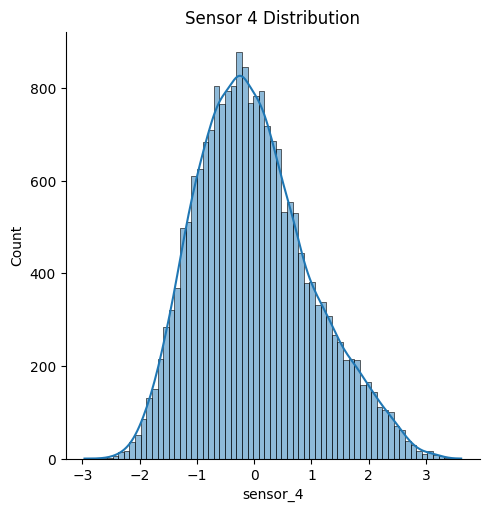

<Figure size 1200x600 with 0 Axes>

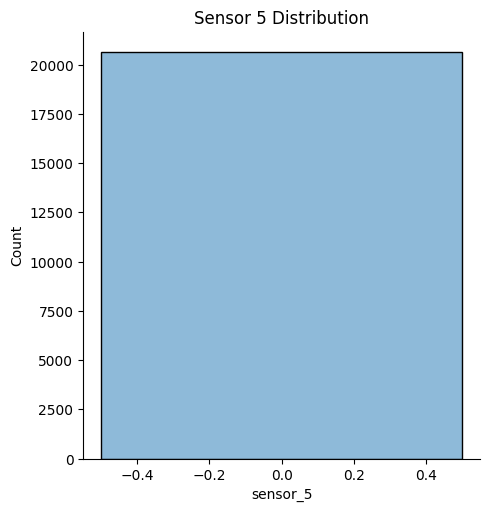

<Figure size 1200x600 with 0 Axes>

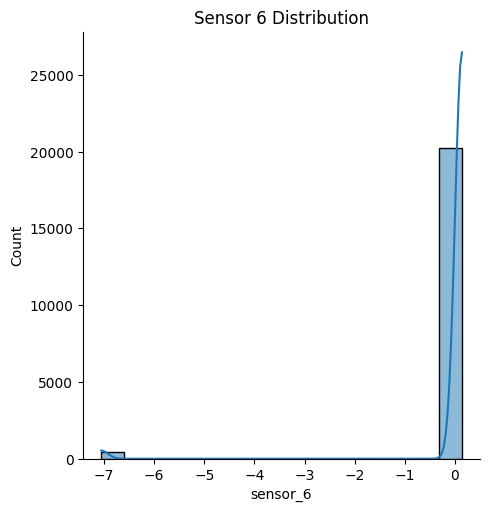

<Figure size 1200x600 with 0 Axes>

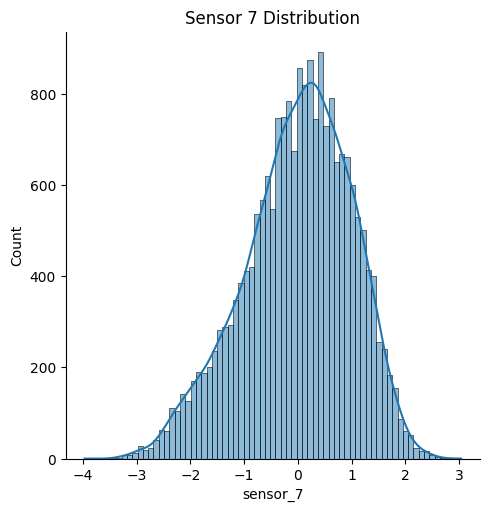

<Figure size 1200x600 with 0 Axes>

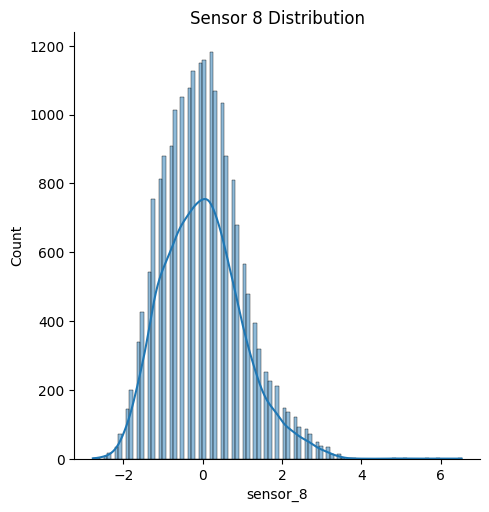

<Figure size 1200x600 with 0 Axes>

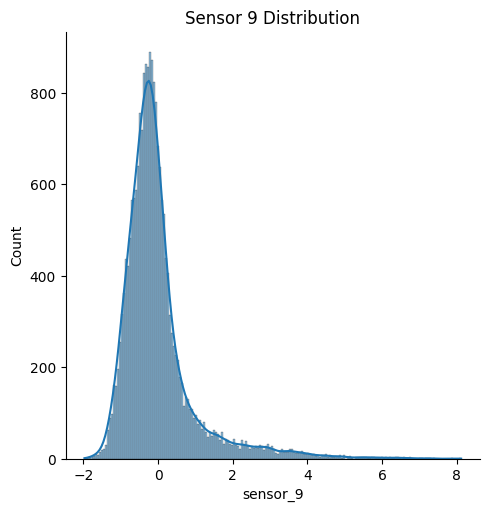

<Figure size 1200x600 with 0 Axes>

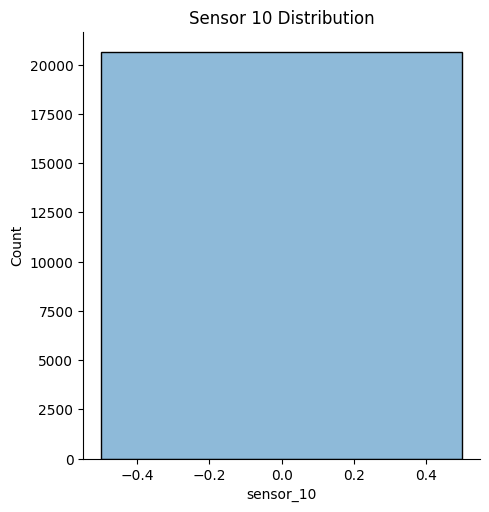

<Figure size 1200x600 with 0 Axes>

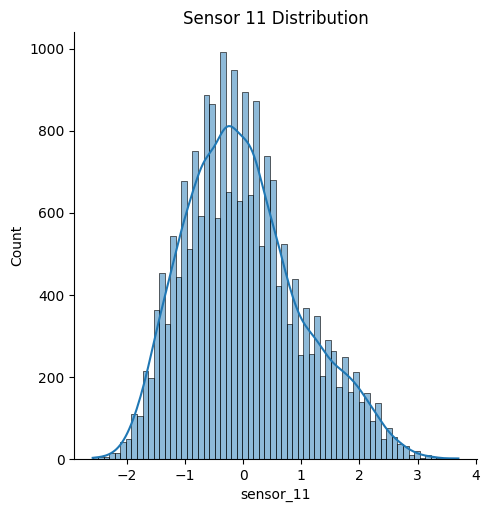

<Figure size 1200x600 with 0 Axes>

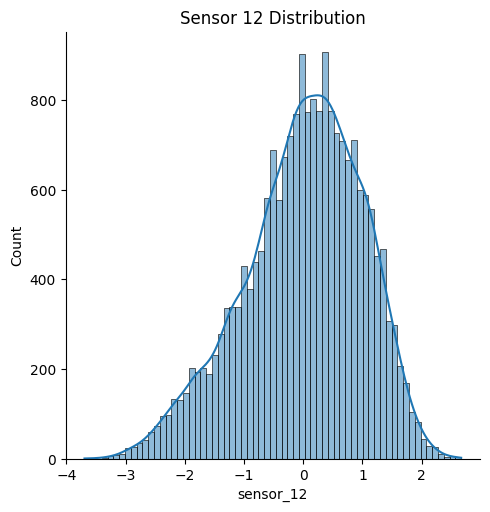

<Figure size 1200x600 with 0 Axes>

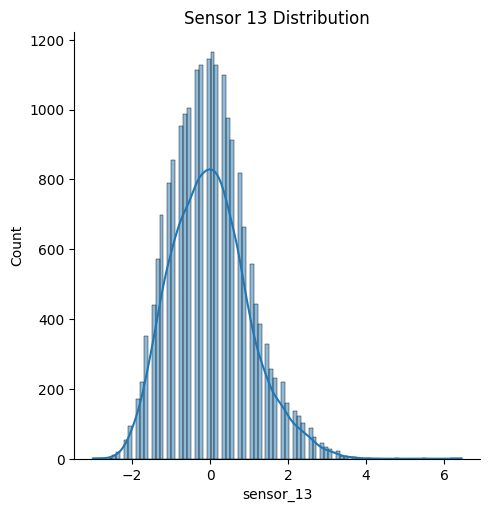

<Figure size 1200x600 with 0 Axes>

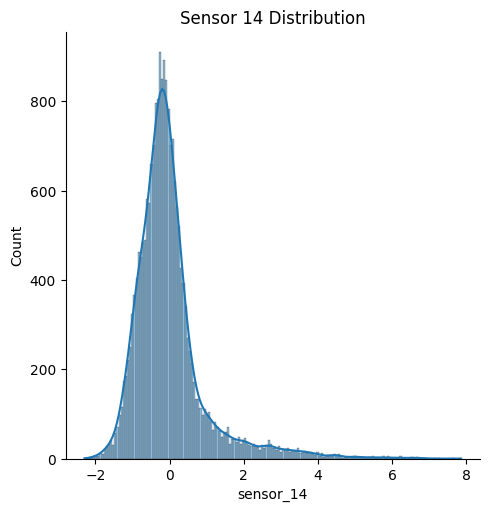

<Figure size 1200x600 with 0 Axes>

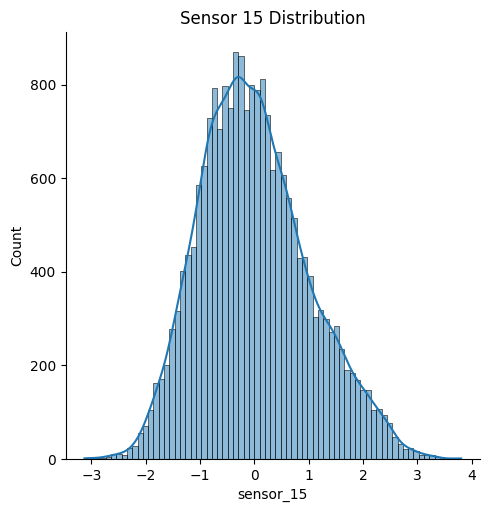

<Figure size 1200x600 with 0 Axes>

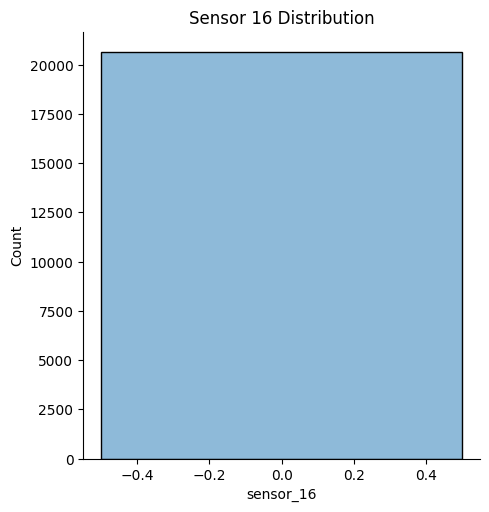

<Figure size 1200x600 with 0 Axes>

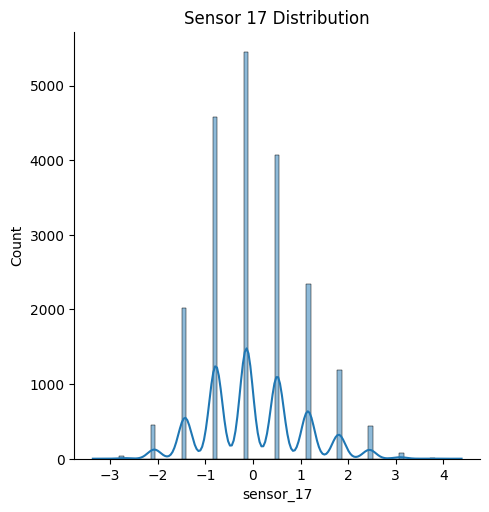

<Figure size 1200x600 with 0 Axes>

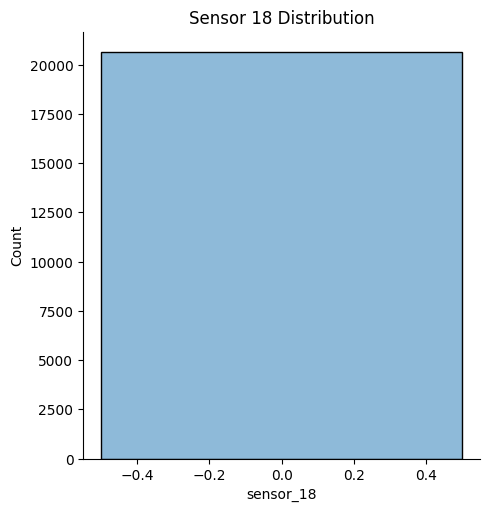

<Figure size 1200x600 with 0 Axes>

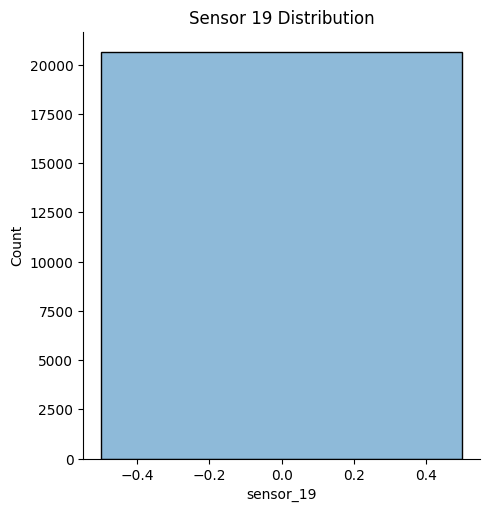

<Figure size 1200x600 with 0 Axes>

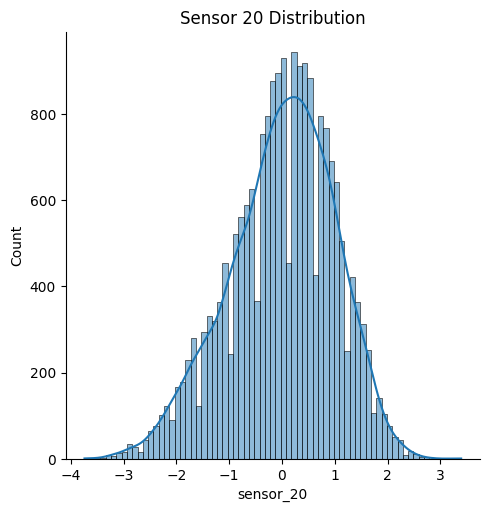

<Figure size 1200x600 with 0 Axes>

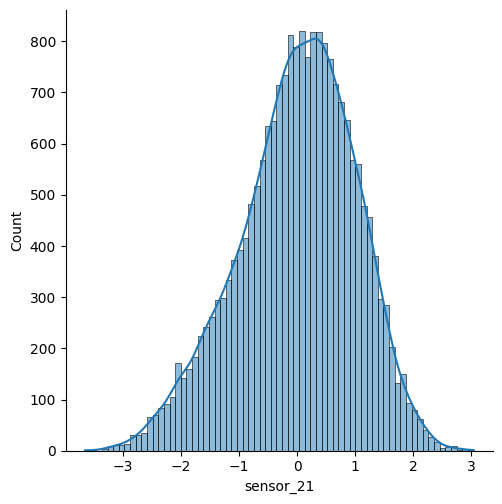

In [133]:
sensor_data = train_df.iloc[:, 5:]

for i in range(1, 22):
    plt.figure(figsize=(12, 6))
    sns.displot(sensor_data.loc[:, f"sensor_{i}"], kde=True)
    plt.title(f"Sensor {i} Distribution")


### Data Preprocessing

##### Apply Standard Scaler

In [134]:
from sklearn.preprocessing import StandardScaler

# Select sensor and settings columns to scale
scale_columns = ["setting_1", "setting_2", "setting_3"] + [f"sensor_{i}" for i in range(1, 22)]

# Extract sensor data
train_sensors = train_df[scale_columns]
test_sensors = test_df[scale_columns]

# Scale sensor data
scaler = StandardScaler()
train_sensors_scaled = scaler.fit_transform(train_sensors)
test_sensors_scaled = scaler.transform(test_sensors)

# Replace the original sensor columns with scaled data
train_df[scale_columns] = train_sensors_scaled
test_df[scale_columns] = test_sensors_scaled

In [135]:
train_df.head()

,unit,time,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.315980,-1.372953,0.0,0.0,-1.721725,-0.134255,-0.925936,0.0,...,-1.058890,-0.269071,-0.603816,0.0,-0.781710,0.0,0.0,1.348493,1.194427,191
1,1,2,0.872722,-1.031720,0.0,0.0,-1.061780,0.211528,-0.643726,0.0,...,-0.363646,-0.642845,-0.275852,0.0,-0.781710,0.0,0.0,1.016528,1.236922,190
2,1,3,-1.961874,1.015677,0.0,0.0,-0.661813,-0.413166,-0.525953,0.0,...,-0.919841,-0.551629,-0.649144,0.0,-2.073094,0.0,0.0,0.739891,0.503423,189
3,1,4,0.324090,-0.008022,0.0,0.0,-0.661813,-1.261314,-0.784831,0.0,...,-0.224597,-0.520176,-1.971665,0.0,-0.781710,0.0,0.0,0.352598,0.777792,188
4,1,5,-0.864611,-0.690488,0.0,0.0,-0.621816,-1.251528,-0.301518,0.0,...,-0.780793,-0.521748,-0.339845,0.0,-0.136018,0.0,0.0,0.463253,1.059552,187


In [136]:
test_df.head()

,unit,time,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,1.055599,1.015677,0.0,0.0,0.678077,-0.853550,-1.191480,0.0,...,-0.919841,-0.954235,-0.985107,0.0,-0.781710,0.0,0.0,0.241943,0.774097,30
1,1,2,-1.230366,-1.031720,0.0,0.0,-1.941707,-0.338137,-1.501467,0.0,...,-0.502695,-0.216648,-1.649034,0.0,-0.136018,0.0,0.0,1.127183,0.941305,29
2,1,3,0.141213,0.333211,0.0,0.0,-0.441831,-0.584426,-0.843717,0.0,...,-0.919841,-0.715712,0.052112,0.0,-0.136018,0.0,0.0,1.459148,1.172256,28
3,1,4,1.924266,-0.008022,0.0,0.0,-0.481827,-1.044384,-0.279297,0.0,...,-0.641744,-0.568929,-1.345067,0.0,-1.427402,0.0,0.0,1.016528,0.775945,27
4,1,5,0.644125,-0.008022,0.0,0.0,-0.341839,-0.543650,-0.779276,0.0,...,-0.919841,-0.745069,-1.041101,0.0,-2.073094,0.0,0.0,0.961200,1.138999,26


### Save Preprocessed Data

In [137]:
train_df.to_csv("data/processed/train_df_processed")
test_df.to_csv("data/processed/test_df_processed")